<a href="https://colab.research.google.com/github/AdrianaCaetano/Exploring-Data-with-Python/blob/main/UScensus_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from US Census

1. Get a Census API key [here](https://api.census.gov/data/key_signup.html)
2. Save the file into your drive or upload it into the notebook for easy access

Check the available APIs [here](https://www.census.gov/data/developers/data-sets.html).  

The examples bellow fetch data from:

- **American Community Survey (ACS)**: Covers a range of topics about social, economic, demographic, and housing characteristics of the U.S. population.


- **Geography Program**: 
    - Census Geocoding Services: Geocoding is the process of inputting an address and receiving back latitude/longitude coordinates calculated along an address range

    - Census TIGERweb GeoServices: The GeoServices REST Specification provides a standard way for web clients to communicate with geographic information system (GIS) servers through Representational State Transfer (REST) technology. Clients issue requests to the server through structured URLs. The server responds with map images, text-based geographic information, or other resources that satisfy the request




- [US Census Geometry]()


References: 
- [US Census API User Guide](https://www.census.gov/data/developers/guidance/api-user-guide.Example_API_Queries.html)
- [How to Get Total Population from the Census API using Python by Ariel Herrera](https://levelup.gitconnected.com/how-to-get-total-population-from-the-census-api-using-python-bbf23758bfa7)
- [Using the U.S. Census Bureau API with Python by Michael McManus](https://medium.com/@mcmanus_data_works/using-the-u-s-census-bureau-api-with-python-5c30ad34dbd7)

In [ ]:
! pip install geopandas


In [ ]:
# Imports
import pandas as pd
import geopandas as gpd
import requests

from matplotlib import pyplot as plt
%matplotlib inline

from census_api import key # import census api key from file

## ACS Data

[US Census Population dataset](https://www.census.gov/data/developers/data-sets/acs-5year.html)

In [ ]:
# Prepare the query for the ASC API request

# ASC examples = https://api.census.gov/data/2010/acs/acs1/examples.html

host = 'https://api.census.gov/data'
year = '/2021'
# Dataset Acronyms: https://api.census.gov/data.html
dataset_acronym = '/acs/acs1'
g = '?get='
# Variables for the ACS: https://api.census.gov/data/2005/acs/acs1/variables.html
variables = 'NAME,B01001_001E'
location = '&for=state:*'
usr_key = f"&key={key}"

query_url = f"{host}{year}{dataset_acronym}{g}{variables}{location}{usr_key}"

# request data
response = requests.get(query_url)

# view status code, 200 is successful 
response.status_code

200

In [ ]:
# Save the response into a dataframe
population_df = pd.DataFrame(
    response.json()[1:], 
    columns=response.json()[0]
    ).rename(columns={'B01001_001E':'total_population',
                    'state': 'fips'}
             )


In [ ]:
population_df.head()

,NAME,total_population,fips
0,Alabama,5039877,01
1,Puerto Rico,3263584,72
2,Arizona,7276316,04
3,Arkansas,3025891,05
4,California,39237836,06


In [ ]:
population_df.shape

(52, 3)

In [ ]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              52 non-null     object
 1   total_population  52 non-null     object
 2   fips              52 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
# Change total population to int

population_df['total_population'] = pd.to_numeric(population_df['total_population'])

In [ ]:
# Change fips to int

population_df['fips'] = pd.to_numeric(population_df['fips'])

In [ ]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              52 non-null     object
 1   total_population  52 non-null     int64 
 2   fips              52 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


## Geography Data

To query the API your request URL query string must include a for argument which defines the geography level and FIPS code(s).

[US Census States Geography](https://www.census.gov/data/developers/geography.html)

In [ ]:
# Prepare the query for Geography request

# Geography examples: https://api.census.gov/data/2010/dec/sf1/examples.html
# https://api.census.gov/data/2010/dec/sf1?get=P001001,NAME&for=state:*&key=YOUR_KEY_GOES_HERE

host = 'https://api.census.gov/data'
year = '/2010'
# Dataset Acronyms: https://api.census.gov/data.html
dataset_acronym = '/dec/sf1'
g = '?get='
# Variables for the ACS: https://api.census.gov/data/2005/acs/acs1/variables.html
variables = 'NAME,P001001'
location = '&for=state:*' # for all states
usr_key = f"&key={key}"

query_url = f"{host}{year}{dataset_acronym}{g}{variables}{location}{usr_key}"

# request data
response = requests.get(query_url)

# view status code, 200 is successful 
response.status_code

200

In [ ]:
# Save the response into a dataframe
pop_df = pd.DataFrame(
    response.json()[1:], 
    columns=response.json()[0] 
    ).rename(columns={'P001001':'total_population',
                    'state': 'fips'}
             )
pop_df.head()

,NAME,total_population,fips
0,Alabama,4779736,01
1,Alaska,710231,02
2,Arizona,6392017,04
3,Arkansas,2915918,05
4,California,37253956,06


In [ ]:
pop_df.shape

(52, 3)

## TIGERWeb GeoFiles

TigerWeb has a directory of html datafiles that can be downloaded as a table straight into a dataframe. It contains some basic geo location information such as latitude and longitude, and land and water area.  

[List of files](https://tigerweb.geo.census.gov/tigerwebmain/TIGERweb_nation_based_files.html)

In [ ]:
# Copy the url of the html file you want to download
url = 'https://tigerweb.geo.census.gov/tigerwebmain/Files/bas23/tigerweb_bas23_state_2022_acs22_us.html'

# Save into a dataframe
state_df = pd.read_html(url)

len(state_df)

1

In [ ]:
# it returned a list with one element, which is the table
state_df = state_df[0]

In [ ]:
type(state_df)

pandas.core.frame.DataFrame

In [ ]:
state_df.head()

,MTFCC,OID,GEOID,STATE,STATENS,BASENAME,NAME,LSADC,FUNCSTAT,AREALAND,AREAWATER,UR,REGION,DIVISION,STUSAB,CENTLAT,CENTLON,INTPTLAT,INTPTLON
0,G4000,2745265038753,1,1,1779775,Alabama,Alabama,0,A,131185039975,4582335766,NaN,3,6.0,AL,32.743686,-86.846795,32.739579,-86.843447
1,G4000,2745245059742,2,2,1785533,Alaska,Alaska,0,A,1478942892154,245378380543,NaN,4,9.0,AK,63.413052,-152.879632,63.347356,-152.839733
2,G4000,274521053753069,4,4,1779777,Arizona,Arizona,0,A,294365830107,854014485,NaN,4,8.0,AZ,34.275102,-111.660534,34.203936,-111.606345
3,G4000,2745245148374,5,5,68085,Arkansas,Arkansas,0,A,134660744864,3121972872,NaN,3,7.0,AR,34.894174,-92.441843,34.895526,-92.444626
4,G4000,2745218475066,6,6,1779778,California,California,0,A,403673658339,20291671562,NaN,4,9.0,CA,37.154758,-119.527772,37.155177,-119.543418


In [ ]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MTFCC      56 non-null     object 
 1   OID        56 non-null     int64  
 2   GEOID      56 non-null     int64  
 3   STATE      56 non-null     int64  
 4   STATENS    56 non-null     int64  
 5   BASENAME   56 non-null     object 
 6   NAME       56 non-null     object 
 7   LSADC      56 non-null     int64  
 8   FUNCSTAT   56 non-null     object 
 9   AREALAND   56 non-null     int64  
 10  AREAWATER  56 non-null     int64  
 11  UR         0 non-null      float64
 12  REGION     56 non-null     int64  
 13  DIVISION   51 non-null     float64
 14  STUSAB     56 non-null     object 
 15  CENTLAT    56 non-null     float64
 16  CENTLON    56 non-null     float64
 17  INTPTLAT   56 non-null     float64
 18  INTPTLON   56 non-null     float64
dtypes: float64(6), int64(8), object(5)
memory usage: 8.4

## Shapefiles

To read shapefiles we use the **GeoPandas** library. It's possible to read a zip file straight into a dataframe.

Get the file name definitions [here](https://www2.census.gov/geo/tiger/TIGER2022/2022_TL_Shapefiles_File_Name_Definitions.pdf) for the directory name reference

In [ ]:
# Prepare the query for the shapefile download

host = 'https://www2.census.gov/geo/tiger/TIGER'
year = '2022/'
dir_name = 'STATE/'
file_name = 'tl_2022_us_state.zip'

url = f"{host}{year}{dir_name}{file_name}"
url

'https://www2.census.gov/geo/tiger/TIGER2022/STATE/tl_2022_us_state.zip'

In [ ]:
states_gdf = gpd.read_file(url)

states_gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [ ]:
states_gdf.shape

(56, 15)

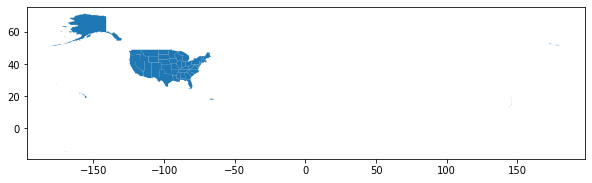

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
states_gdf.plot(ax=ax)

In [ ]:
states_gdf[states_gdf['NAME']=='California']

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
13,4,9,06,01779778,06,CA,California,00,G4000,A,403673617862,20291712025,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.99987 41.18397, -119.9998..."


In [ ]:
# check data original projection

states_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

# Merging DataFrames

Attribute joins are accomplished using the `merge()` method. In general, it is recommended to use the `merge()` method called from the spatial dataset. 

The stand-alone `pandas.merge()` function will work if the **GeoDataFrame** is in the **left** argument; if a DataFrame is in the left argument and a GeoDataFrame is in the right position, the result will no longer be a GeoDataFrame.


In [ ]:
# Merge the 2021 ASC data with the 2010 Tiger data

states_pop_gdf = states_gdf.merge(population_df, on='NAME')

states_pop_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   REGION            52 non-null     object  
 1   DIVISION          52 non-null     object  
 2   STATEFP           52 non-null     object  
 3   STATENS           52 non-null     object  
 4   GEOID             52 non-null     object  
 5   STUSPS            52 non-null     object  
 6   NAME              52 non-null     object  
 7   LSAD              52 non-null     object  
 8   MTFCC             52 non-null     object  
 9   FUNCSTAT          52 non-null     object  
 10  ALAND             52 non-null     int64   
 11  AWATER            52 non-null     int64   
 12  INTPTLAT          52 non-null     object  
 13  INTPTLON          52 non-null     object  
 14  geometry          52 non-null     geometry
 15  total_population  52 non-null     int64   
 16  fips              52

In [ ]:
# Drop the unnecessary columns 
columns_lst = ['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS',
       'LSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER']

states_pop_gdf.drop(columns=columns_lst, inplace=True)

states_pop_gdf.head()

,NAME,INTPTLAT,INTPTLON,geometry,total_population,fips
0,West Virginia,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",1782959,54
1,Florida,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",21781128,12
2,Illinois,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",12671469,17
3,Minnesota,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998...",5707390,27
4,Maryland,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",6165129,24


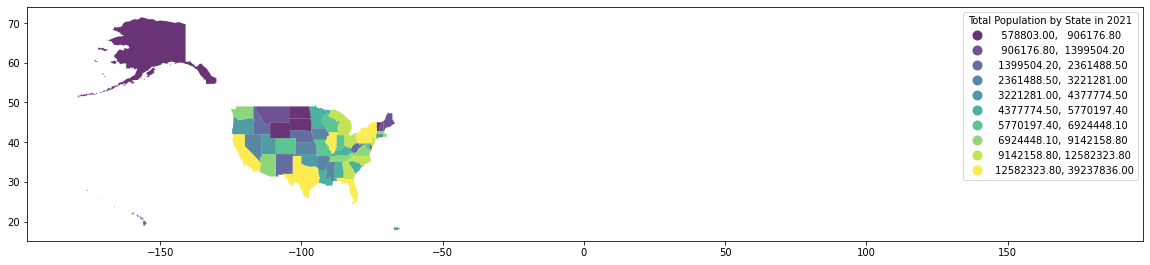

In [ ]:
# Plot population per state
# import mapclassify
# from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(20,20))
# fig.suptitle("Total Population by State in 2021")
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="50%", pad=0.1)

states_pop_gdf.plot(column='total_population', 
                    scheme= 'quantiles', 
                    k=10,
                    linewidth=0.1, 
                    missing_kwds={'color': 'lightgrey'},
                    alpha=0.8, 
                    legend=True,
                    # cax=cax,
                    ax=ax, 
                    legend_kwds= {'title': "Total Population by State in 2021"}
                    )